In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [52]:
#importing dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df.head(15)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


In [53]:
#displating max_rows
pd.set_option('display.max_rows', 15)

In [54]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [55]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Our target variable in Nominal in nature so this is a classification problem

In [56]:
#lets rename the columns according to the given columns nmaes
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [57]:
df['Type of glass'].nunique()

6

lets divide the dataset into window glass (classes 1-4) and non-window glass (classes 5-7). 

# Converting multiclassification into binary classification problem

In [58]:
def fun(num):
    if num>=5:
        return 1
    else:
        return 0
df['Type of glass']=df['Type of glass'].apply(fun)

In [59]:
df['Type of glass'].nunique()

2

In [60]:
df.tail(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
203,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,1
204,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,1
205,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,1
206,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,1
207,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,1
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,1
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,1
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,1
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,1
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,1


In [61]:
df['Type of glass'].value_counts(normalize=True)*100

0    76.056338
1    23.943662
Name: Type of glass, dtype: float64

we are able to observe imbalance in the dataset

 window glass is only 23.94% and  non-window glass is 76% here

we will go with oversampling since there wont be any dataloss through it

In [62]:
#Syntax : DataFrame.duplicated(subset = None, keep = ‘first’)

In [63]:
df.shape

(213, 11)

In [64]:
df.drop_duplicates(inplace=True)
df.shape

(213, 11)

there are no duplicates in the dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 20.0 KB


there are no null values or empty spaces in the dataset

In [66]:
df['Id number']

0        2
1        3
2        4
3        5
4        6
      ... 
208    210
209    211
210    212
211    213
212    214
Name: Id number, Length: 213, dtype: int64

it contains unique numbers so it wont have any relationshp in the model,so lets drop the column

In [67]:
df.drop('Id number',axis=1,inplace=True)

In [68]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

# 

# Missing values

In [69]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

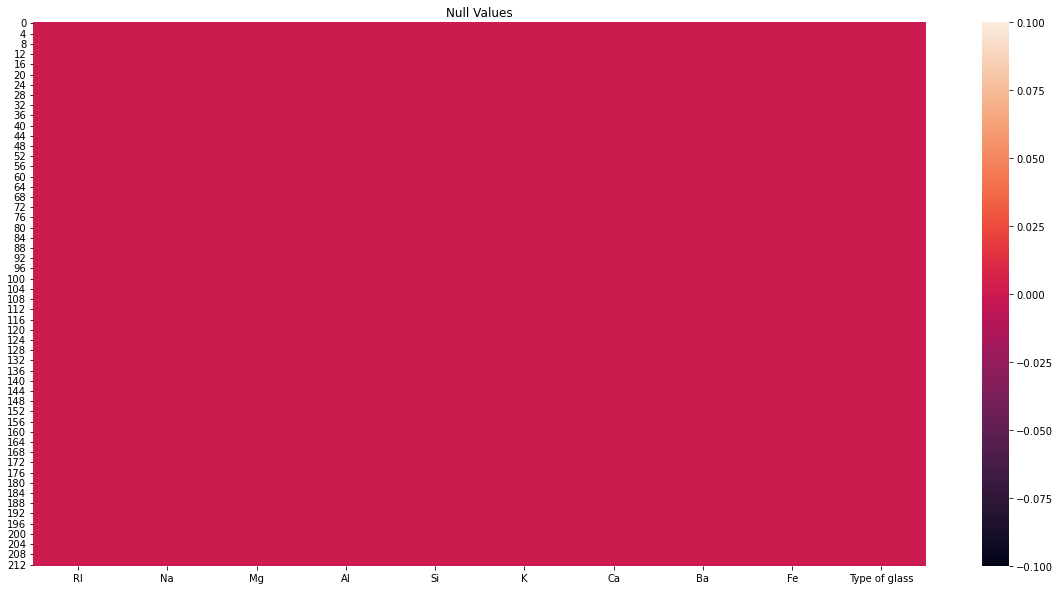

In [70]:
#heatmap on null values
plt.figure(figsize=[20,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

we can observe there are no null values

# Statistics summary

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,213.0,1.518353,0.003039,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.406761,0.818371,10.73000,12.90000,13.30000,13.83000,17.38000
Mg,213.0,2.676056,1.440453,0.00000,2.09000,3.48000,3.60000,3.98000
Al,213.0,1.446526,0.499882,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655023,0.774052,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.499108,0.653035,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.957934,1.426435,5.43000,8.24000,8.60000,9.18000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000
Type of glass,213.0,0.239437,0.427745,0.00000,0.00000,0.00000,0.00000,1.00000


In [72]:
 df["Type of glass"].value_counts()

0    162
1     51
Name: Type of glass, dtype: int64

Text(0.5, 1.0, 'Types of glass distributed')

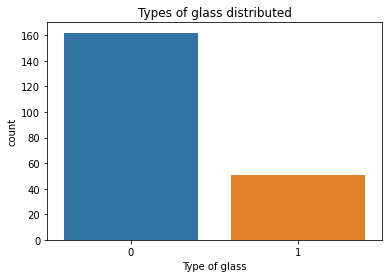

In [73]:
sns.countplot(df["Type of glass"])
plt.title("Types of glass distributed")

# Data Visualization

In [74]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [75]:
columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

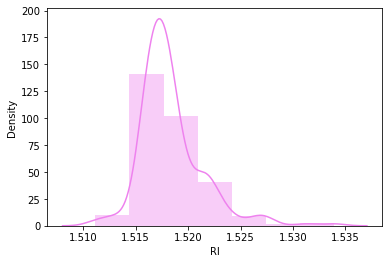

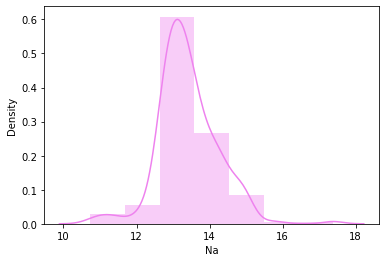

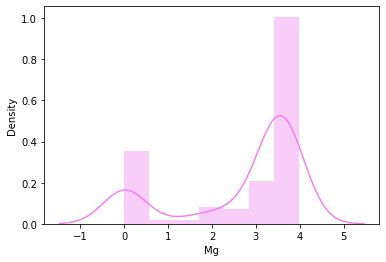

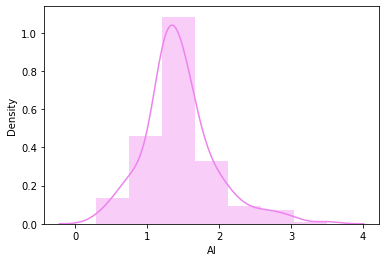

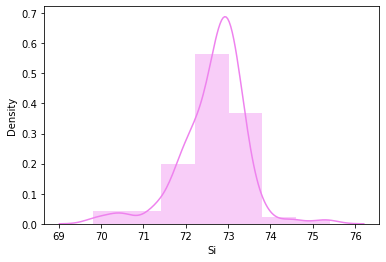

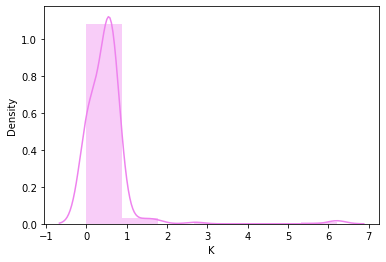

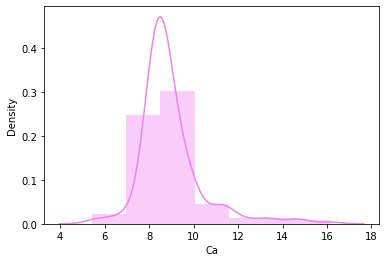

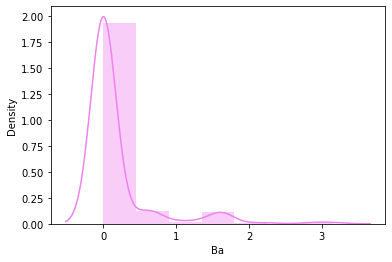

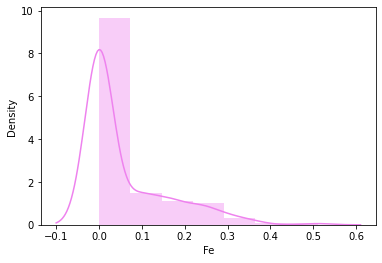

In [76]:
def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='violet',bins=7)
    
for i in range(0,9):
    dtp(i)

In [77]:
collist=df.columns.values
ncol=9
nrows=9

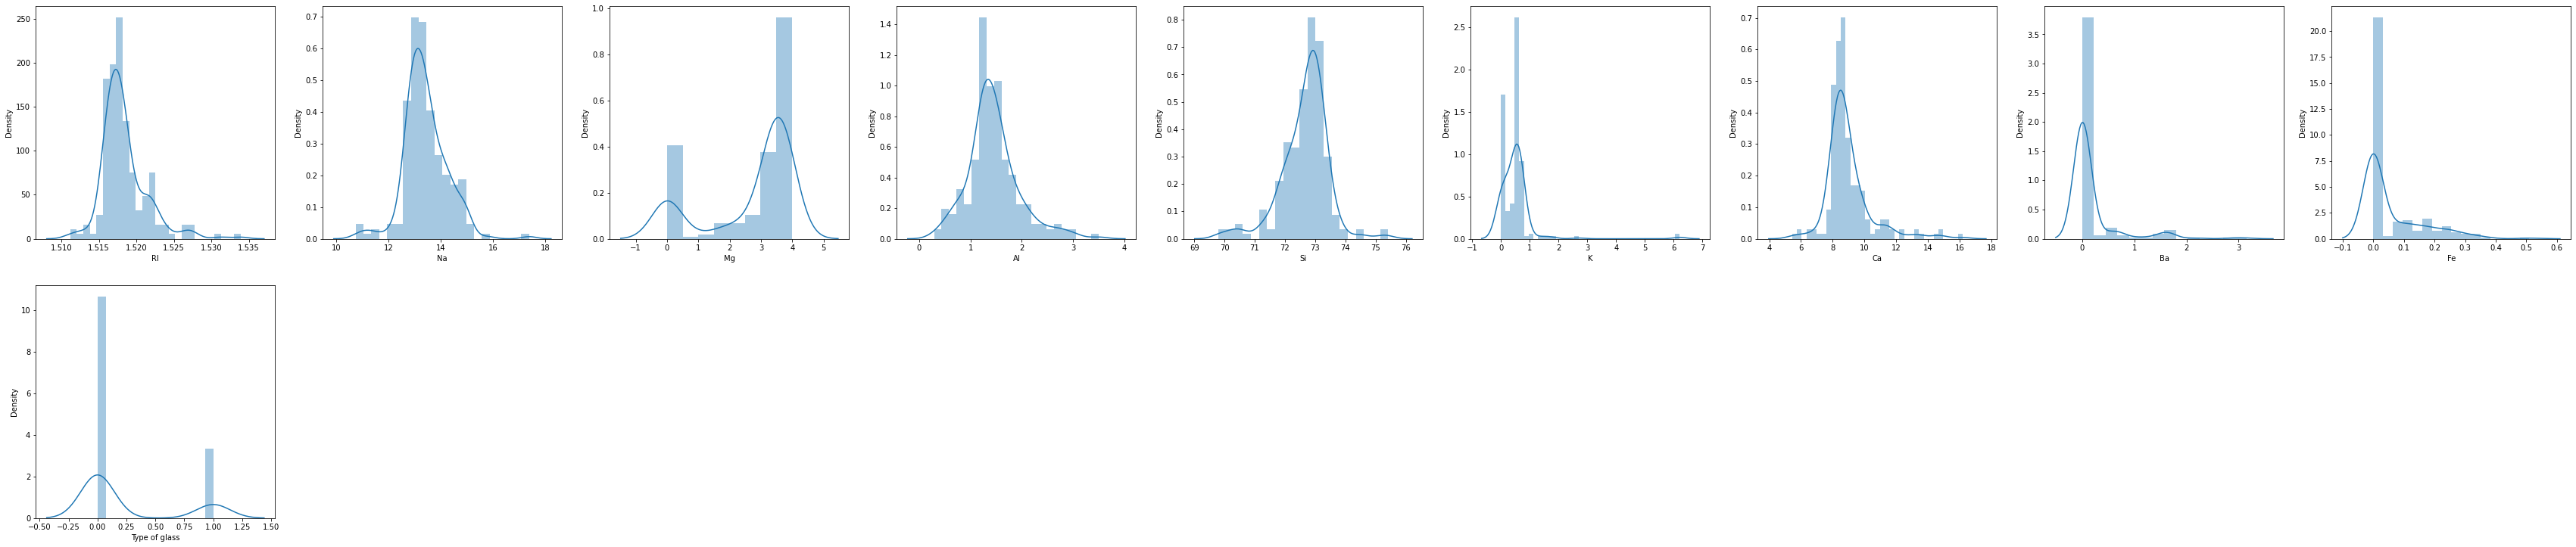

In [78]:
plt.figure(figsize=(60,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

# Checking distribution relationship

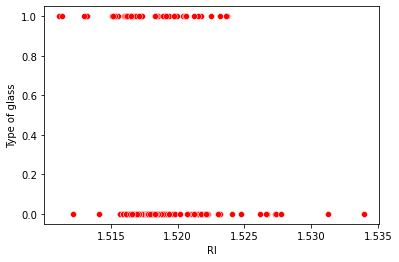

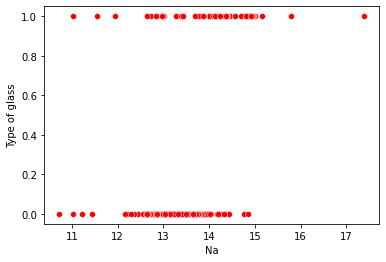

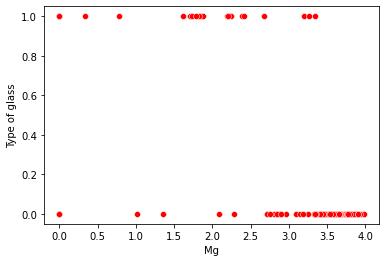

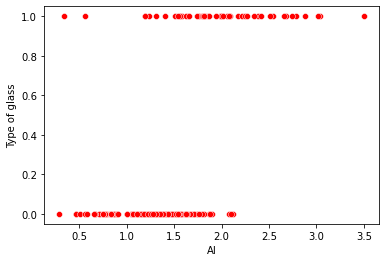

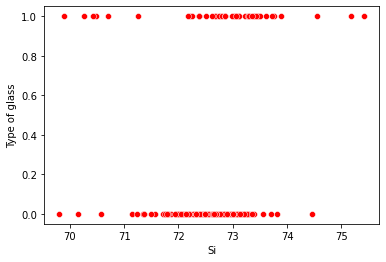

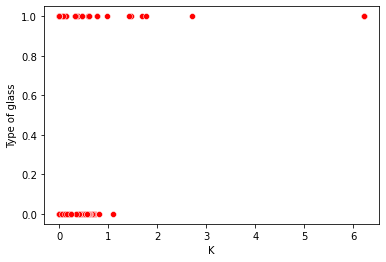

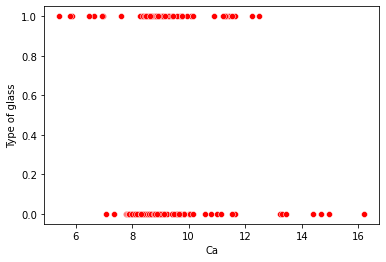

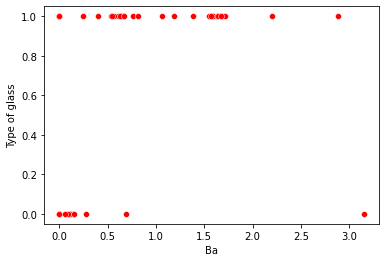

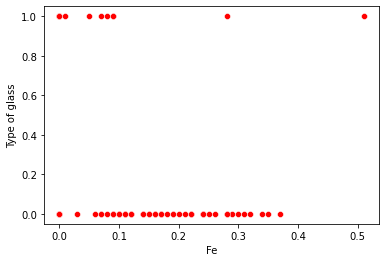

In [79]:
#relationship for each feature name with the output
def dtp(a):
    plt.figure()
    sns.scatterplot(x=df[columns[a]],y=df['Type of glass'],color='red')
    
for i in range(0,9):
    dtp(i)

# multivariate Analysis

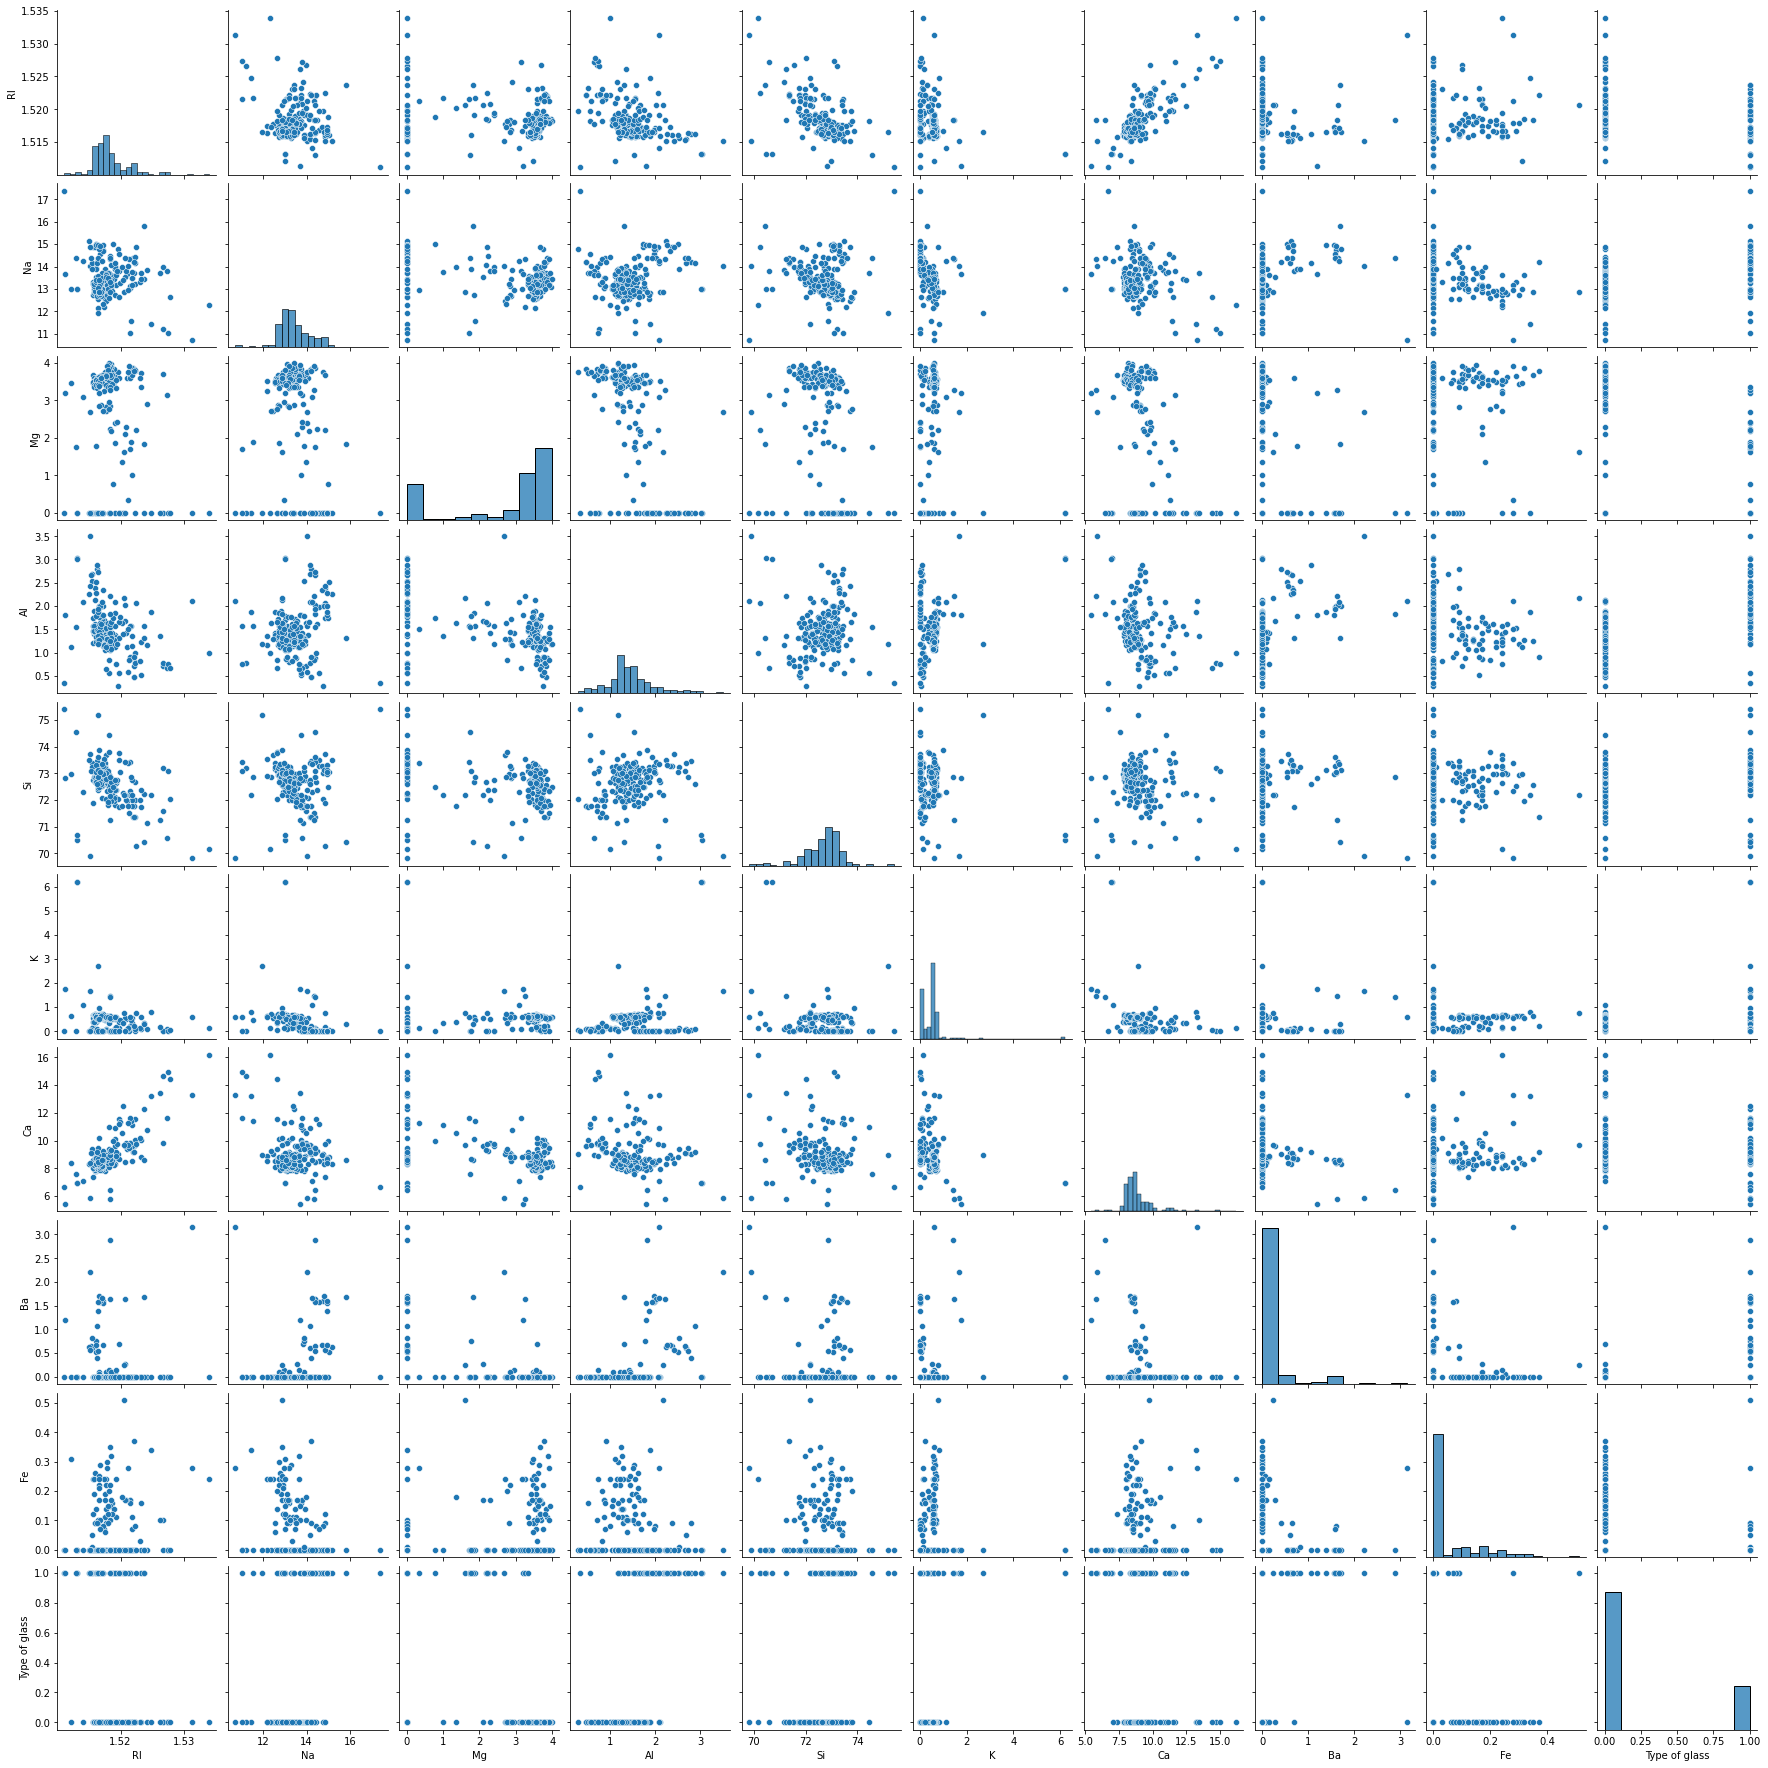

In [80]:
sns.pairplot(df)

# check Skewness

In [81]:
X=df.drop('Type of glass',axis=1)
y=df['Type of glass']

In [82]:
X.Ba

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
208    1.06
209    1.59
210    1.64
211    1.57
212    1.67
Name: Ba, Length: 213, dtype: float64

In [83]:
X.skew().sort_values(ascending=False)

K     6.549276
Ba    3.406749
Ca    2.040591
Fe    1.747173
RI    1.639658
Al    0.900017
Na    0.457318
Si   -0.744546
Mg   -1.154323
dtype: float64

In [86]:
from sklearn.preprocessing import power_transform


In [87]:
X_new=power_transform(X)
X_new

array([[-2.08166817e-17,  6.16990160e-01,  6.81474184e-01, ...,
        -8.82520734e-01, -4.56097489e-01, -6.82179894e-01],
       [-6.24500451e-17,  1.84791856e-01,  6.20551713e-01, ...,
        -9.36107476e-01, -4.56097489e-01, -6.82179894e-01],
       [-2.08166817e-17, -2.10309828e-01,  7.93248682e-01, ...,
        -4.87918486e-01, -4.56097489e-01, -6.82179894e-01],
       ...,
       [ 6.93889390e-17,  1.16274955e+00, -1.73883553e+00, ...,
        -2.82179217e-01,  2.37156428e+00, -6.82179894e-01],
       [-5.20417043e-17,  1.18552756e+00, -1.73883553e+00, ...,
        -2.45978517e-01,  2.37134679e+00, -6.82179894e-01],
       [-3.81639165e-17,  1.01381998e+00, -1.73883553e+00, ...,
        -1.22063682e-01,  2.37164215e+00, -6.82179894e-01]])

In [88]:
X=pd.DataFrame(X_new,columns=X.columns)


In [89]:
X.skew().sort_values(ascending=False)

Ba    1.817526
Fe    0.852473
Si    0.133867
Al    0.000874
RI    0.000000
Na   -0.009526
K    -0.075233
Ca   -0.207808
Mg   -0.911150
dtype: float64

In [90]:
X['Ba']

0     -0.456097
1     -0.456097
2     -0.456097
3     -0.456097
4     -0.456097
         ...   
208    2.365582
209    2.371415
210    2.371564
211    2.371347
212    2.371642
Name: Ba, Length: 213, dtype: float64

In [52]:
X.skew().sort_values(ascending=False)

Si    0.133867
Al    0.000874
RI    0.000000
Na   -0.009526
K    -0.075233
Ca   -0.207808
Mg   -1.559079
Ba   -2.206772
Fe   -3.377371
dtype: float64

In [44]:
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False)

Si   -0.674822
Ca   -0.870998
Al   -1.453773
Mg   -1.559079
Na   -1.852934
Ba   -2.206772
K    -2.728934
Fe   -3.377371
RI         NaN
dtype: float64